<a href="https://colab.research.google.com/github/sudiksha2004/GDSC_MACHINE_LEARNING_-Sudiksha-Roy-Kanungoe-./blob/main/Cats_vs_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow_datasets

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt

In [4]:
dataset,info = tfds.load('cats_vs_dogs',with_info= True , as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incompleteBYDIHD/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [5]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir=PosixGPath('/tmp/tmpl8k6lam4tfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    

In [6]:
info.features['label']

ClassLabel(shape=(), dtype=int64, num_classes=2)

In [7]:
class_names = info.features['label'].names
class_names

['cat', 'dog']

In [8]:
for i,example in enumerate(dataset['train']):
  image,label = example
  save_dir = './cats_vs_dogs/train/{}'.format(class_names[label])
  os.makedirs(save_dir,exist_ok = True)
  filename = save_dir + "/" +"{}_{}.jpg".format(class_names[label],i)
  tf.keras.preprocessing.image.save_img(filename,image.numpy())
 # print(filename)
 # break

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [10]:
datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2 , rotation_range = 10, width_shift_range = 0.1, height_shift_range=0.1, shear_range = 0.1,zoom_range = 0.10 ,horizontal_flip = True )
train_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train', target_size = (150,150), batch_size = 216, class_mode = 'binary',subset = 'training')
validation_generator =datagen.flow_from_directory('/content/cats_vs_dogs/train', target_size = (150,150), batch_size = 216, class_mode = 'binary',subset = 'validation')

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


Build CNN Model

In [11]:
from keras.backend import batch_normalization
model = Sequential()
# 1st layer
model.add(Conv2D(32,kernel_size = 3,activation = 'relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 2nd layer
model.add(Conv2D(64,kernel_size = 3,activation = 'relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#3rd layer
model.add(Conv2D(128,kernel_size = 3,activation = 'relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 74, 74, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0

In [13]:
model.compile(loss = 'binary_crossentropy',optimizer='adam', metrics = ['accuracy'])
history = model.fit(train_generator,epochs = 10, validation_data= validation_generator )

Epoch 1/10
87/87 [==============================] - 183s 2s/step - loss: 2.7590 - accuracy: 0.6143 - val_loss: 1.1104 - val_accuracy: 0.5018
Epoch 2/10
87/87 [==============================] - 163s 2s/step - loss: 0.7258 - accuracy: 0.6782 - val_loss: 0.6518 - val_accuracy: 0.6169
Epoch 3/10
87/87 [==============================] - 162s 2s/step - loss: 0.5506 - accuracy: 0.7308 - val_loss: 1.1305 - val_accuracy: 0.5420
Epoch 4/10
87/87 [==============================] - 172s 2s/step - loss: 0.5083 - accuracy: 0.7557 - val_loss: 1.6023 - val_accuracy: 0.5309
Epoch 5/10
87/87 [==============================] - 161s 2s/step - loss: 0.4772 - accuracy: 0.7671 - val_loss: 1.4709 - val_accuracy: 0.5605
Epoch 6/10
87/87 [==============================] - 161s 2s/step - loss: 0.4662 - accuracy: 0.7785 - val_loss: 1.6899 - val_accuracy: 0.5827
Epoch 7/10
87/87 [==============================] - 161s 2s/step - loss: 0.4483 - accuracy: 0.7875 - val_loss: 1.1954 - val_accuracy: 0.6547
Epoch 8/10
87

<ipython-input-14-f8d66f215bbb>:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Training','Validation')


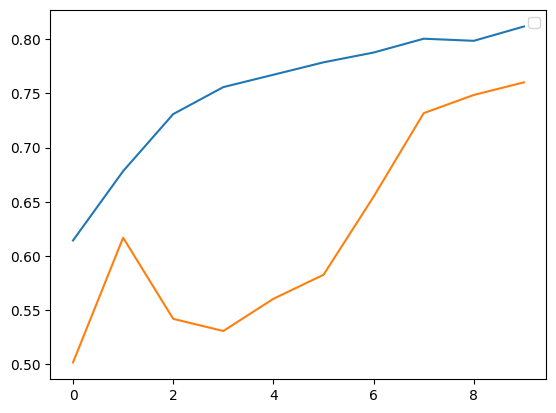

In [14]:
history.history
plt.plot(history.history['accuracy'], label = 'Training' )
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.legend('Training','Validation')

In [15]:
#save model
model.save('cats_vs_dogs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
model_load = tf.keras.models.load_model('cats_vs_dogs.h5')

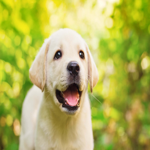

In [74]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image
img_url = "https://tractive.com/blog/wp-content/uploads/2016/04/puppy-care-guide-for-new-parents.jpg"
img = Image.open(requests.get(img_url, stream = True).raw).resize((150,150))
img


In [75]:
image_array = image.img_to_array(img)
img = np.expand_dims(image_array, axis = 0)
img = img/255
prediction = model.predict(img)


1/1 [==============================] - 0s 24ms/step


In [67]:
TH = 0.5
prediction =int(prediction>TH)

In [68]:
classes={v:k for k,v in train_generator.class_indices.items()}

In [76]:
TH = 0.5
prediction = int(prediction[0][0] >TH)
classes ={v:k for k,v in train_generator.class_indices.items()}
print("The given picture is of a",classes[prediction])

The given picture is of a dog


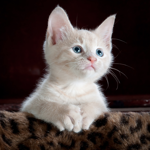

In [82]:
img_url = "https://cdn.pixabay.com/photo/2014/11/30/14/11/cat-551554_1280.jpg"
img = Image.open(requests.get(img_url, stream = True).raw).resize((150,150))
img

In [84]:
image_array = image.img_to_array(img)
img = np.expand_dims(image_array, axis = 0)
img = img/255
prediction = model.predict(img)


1/1 [==============================] - 0s 18ms/step


In [79]:
TH = 0.5
prediction =int(prediction>TH)

In [80]:
classes={v:k for k,v in train_generator.class_indices.items()}

In [85]:
TH = 0.5
prediction = int(prediction[0][0] >TH)
classes ={v:k for k,v in train_generator.class_indices.items()}
print("The given picture is of a",classes[prediction])

The given picture is of a cat
